In [1]:
# Run this cell first!

from helpers import Map, load_map, show_map
from student_code import shortest_path
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [21]:
def plot_map(map_nodes):
    for i in map_nodes:
        x = map_nodes[i][0]
        y = map_nodes[i][1]
        plt.scatter(x,y)
        plt.text(x+0.01, y+0.01, i, fontsize=9)
        
    plt.show()
    return 

def distance(start, goal):
    x1 = start[0]
    y1 = start[1]
    x2 = goal[0]
    y2 = goal[1]
    
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def generate_g_dict(map_roads):
    g_dict = {node:{} for node in range(len(map_roads))}
    for node_1, child_node in enumerate(map_roads):
        for node_2 in child_node:
            if node_1 != node_2:
                if node_2 in g_dict[node_1]:
                    g_dict[node_1][node_2] = g_dict[node_2][node_1]
                else:
                    g = distance(map_nodes[node_1], map_nodes[node_2])
                    g_dict[node_1][node_2] = g
    return g_dict

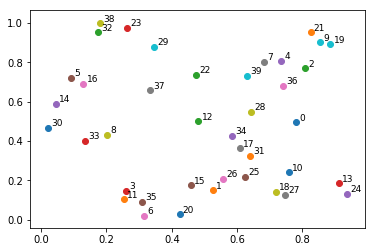

In [22]:
maps = load_map('map-40.pickle')

map_nodes = maps.intersections
map_roads = maps.roads

# Show the points on map
plot_map(map_nodes)

In [69]:
def begin_search(node, goal, path):
    child_nodes = map_roads[node]

    if goal in child_nodes:
        path.append(goal)
        return path
    
    total_cost = []
    for child_node in child_nodes:        
        total_cost.append((cost_dict[node][child_node]+distance(map_nodes[child_node],map_nodes[goal]),child_node))
    
    total_cost.sort()
    
    while len(total_cost)>0:
        next_node = total_cost.pop(0)
        if next_node[1] not in path:
            path.append(next_node[1])
            return begin_search(next_node[1], goal, path)

def a_start_search(start_node, goal_node):
    if start_node not in map_nodes or goal_node not in map_nodes:
        return "Node not in map"
    if start_node == goal_node:
        return [start_node]
    path = [start_node]
    return begin_search(start_node,goal_node,path)

In [74]:
start_node = 8
goal_node = 24
cost_dict = generate_g_dict(map_roads)
short_path = a_start_search(start_node, goal_node)
short_path
# answer: # 8, 24, [8, 14, 16, 37, 12, 17, 10, 24]

[8, 33, 30, 14, 16, 37, 12, 34, 31, 10, 24]

In [75]:
map_roads[8]

[33, 30, 14]

In [78]:
for i in map_roads[start_node]:
    print(cost_dict[start_node][i]+distance(map_nodes[i],map_nodes[goal_node]))

0.922342543837
1.15801470438
1.22238896653


In [79]:
# def begin_search(node, goal, path):
#     child_nodes = map_roads[node]
#     if goal in child_nodes:
#         path.append(goal)
#         return path
    
#     total_cost = []
#     for child_node in child_nodes:        
#         total_cost.append(cost_dict[node][child_node]+distance(child_node,goal))
    
#     next_node = child_nodes[total_cost.index(min(total_cost))]
#     path.append(next_node)
    
#     if path[-1] != goal:
#         return begin_search(next_node, goal, path)
#     else:
#         return "Path not found"

# def a_start_search(start_node, goal_node):
#     if start_node not in map_nodes or goal_node not in map_nodes:
#         return "Node not in map"
#     if start_node == goal_node:
#         return [start_node]
#     path = [start_node]
#     return begin_search(start_node,goal_node,path)